In [1]:
"""
k-means clustering exercise

Consider US Arrests datasets which contains statistics, in arrests per 100,000 residents for assault, murder, and rape 
in each of the 50 US states in 1973. Use k-means clustering to find clusters of the states committing similar crimes using 
'USArrests' dataset.
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
USarrests = pd.read_csv("Datasets/USArrests.csv")

USarrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Take all the entries of columns 0, 1, 2, 3

x = USarrests.iloc[:, [1,2,3,4]]

In [4]:
# Apply kmeans with 3 clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

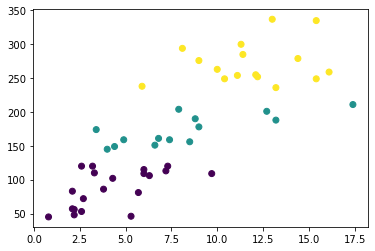

In [5]:
# Visualising the clusters - picking columns 0 against 1 of x where the label is either 0, 1 or 2.

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = kmeans.labels_)

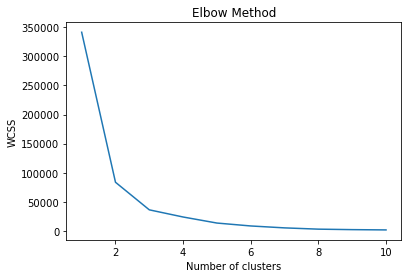

In [6]:
"""
Elbow method to determine k. 

kmeans.inertia_ gives how internally coherent the clusters are (i.e how compact they are - the lower the better). 

Running kmeans against 0-10 nodes and finding the lowest within cluster sum of squares.
"""

from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = x.iloc[:,[0,1]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal number is 3

For no of clusters = 2  The average silhouette_score is : 0.63071205666377
For no of clusters = 3  The average silhouette_score is : 0.6132747140561386
For no of clusters = 4  The average silhouette_score is : 0.6137070855684204
For no of clusters = 5  The average silhouette_score is : 0.5853365628499101
For no of clusters = 6  The average silhouette_score is : 0.598253703941821
For no of clusters = 7  The average silhouette_score is : 0.6388356386211304
For no of clusters = 8  The average silhouette_score is : 0.6718848667776669
For no of clusters = 9  The average silhouette_score is : 0.667648734850023


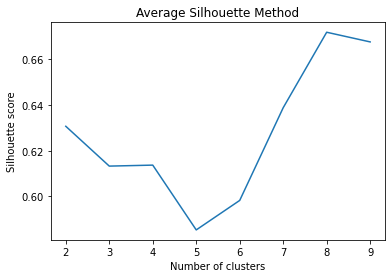

In [7]:
"""
Silouette Width
"""

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt

x = x.iloc[:,[0,1]]

result=[]
no_of_clusters = range(2,10)

for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(x) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(x, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 
    result.append(silhouette_avg)


plt.plot(no_of_clusters,result)
plt.title('Average Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Highest quality of clustering between 7-9 clusters